#                   **Corporacion Favorita Grocery Sales Data Analysis**

## Introduction

 Here we need to predict the unit sales for thousands of items sold at different  [Favorita](https://www.corporacionfavorita.com/en/)    stores located in Ecuador,South America.  The data contains six files which are needed for forecasting sales.

 * Training data which includes the target  **unit_sales**  by **date, store_nbr**, and **item_nbr** and a unique id to label    rows. Negative values of unit_sales represent returns of that particular item. The **onpromotion** column tells whether that item_nbr was on promotion for a specified date and store_nbr.


 * Test data includes with the date, store_nbr, item_nbr combinations that are to be predicted, along with the onpromotion information.
 
 
 * Items data have Item metadata, including family, class, and **perishable** have a score weight of 1.25; otherwise, the weight is 1.0
 
 
 * Stores have Store metadata, including city, state, type, and cluster.
 
 
 * Transactions data contains count of sales transactions for each date, store_nbr combination
 
 
 * Holidays_events data contains details about holidays in Ecaudor.

## Import Libraries

In [92]:

from datetime import date, timedelta
import numpy as np
import pandas as pd


import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = 'whitegrid', color_codes = True)
%matplotlib inline


In [93]:
SAMPLE = True

###  Load Training data

In [94]:
train =pd.read_csv("../project_2/favorita-grocery-sales-forecasting/train.csv", parse_dates=['date'])

if SAMPLE:
    train = train.sample(frac=0.02)

C:\Users\16473\miniconda3\envs\sm-202011\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [95]:
train.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
27847184,27847184,2014-07-25,4,360313,9.000,False
112164010,112164010,2017-04-11,49,123927,2.000,False
64514810,64514810,2015-12-10,44,264300,1.000,False
66065941,66065941,2015-12-27,49,1463510,2.000,False
53239922,53239922,2015-08-06,11,1473402,3.244,False


In [96]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2509941 entries, 27847184 to 44296042
Data columns (total 6 columns):
id             int64
date           datetime64[ns]
store_nbr      int64
item_nbr       int64
unit_sales     float64
onpromotion    object
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 134.0+ MB


In [97]:
train.shape

(2509941, 6)

In [98]:
train.isnull().sum()

id                  0
date                0
store_nbr           0
item_nbr            0
unit_sales          0
onpromotion    432543
dtype: int64

In [99]:
train['onpromotion'].value_counts(normalize=True, dropna=False)

False    0.765752
NaN      0.172332
True     0.061916
Name: onpromotion, dtype: float64

**onpromotion** column has 17% missing values and **6% true cases**, which is very small comparatively with false cases of **76%**

(0.0, 2210290.8)

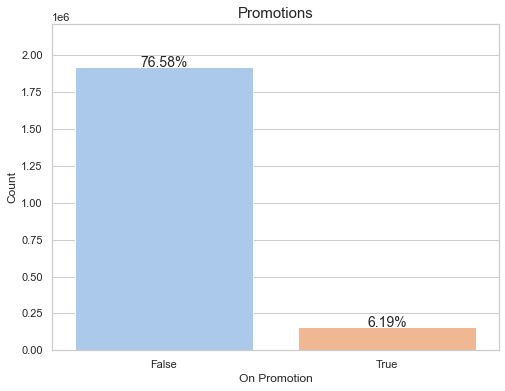

In [100]:
total = len(train)
plt.figure(figsize=(8,6))
g = sns.countplot(x='onpromotion', data=train, palette='pastel')
g.set_title("Promotions", fontsize = 15)
g.set_xlabel("On Promotion", fontsize = 12)
g.set_ylabel("Count", fontsize = 12)
sizes=[] # Get highest values in y
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
g.set_ylim(0, max(sizes) * 1.15) # set y limit based on highest heights

In [101]:
#train.index=train['date']

In [102]:
print(len(train['date'].unique()))

1684


 We have **240** weeks in training data of grocery sales

In [103]:
print (train.date.min())
print (train.date.max())

2013-01-01 00:00:00
2017-08-15 00:00:00


The traing data contains sales data from **2013-01-01** to **2017-08-15**

In [104]:
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month

<AxesSubplot:xlabel='date', ylabel='unit_sales'>

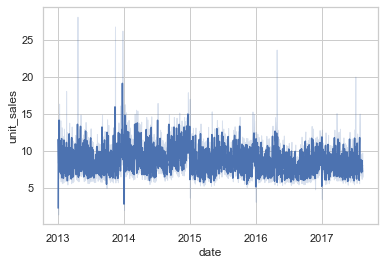

In [105]:
sns.lineplot(train['date'],train['unit_sales'])

The line plot shows the **unit_sales** from 2013-2017, we can observe that the sales are high in 2014 and decreasing from 2015 to mid august 2017. due to earthquake in 2016.

<AxesSubplot:xlabel='month', ylabel='unit_sales'>

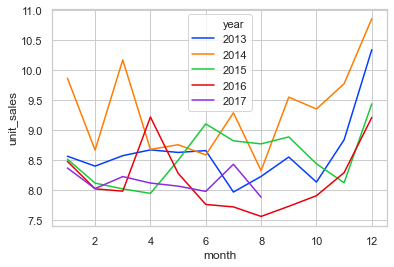

In [106]:
palette = sns.color_palette('bright', n_colors=5)
sns.lineplot(x="month", y="unit_sales",ci=None, hue="year", data=train, palette=palette)

Every year the sales are high in December month and low in January,Febrarury and July months

<AxesSubplot:xlabel='year', ylabel='unit_sales'>

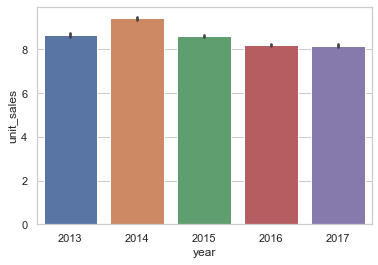

In [107]:
sns.barplot(x="year", y="unit_sales", data=train)

In [108]:
train["onpromotion"] = train["onpromotion"].fillna(train["onpromotion"].mean())

In [109]:
train["onpromotion"] = train["onpromotion"].astype(int)

<AxesSubplot:xlabel='onpromotion', ylabel='unit_sales'>

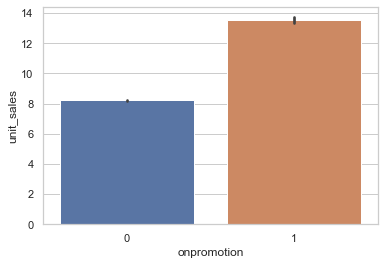

In [110]:
sns.barplot(data=train, x="onpromotion",y="unit_sales")

The promotional items sold almost double times than items not on promotion

In [111]:
Store_Sales = train.groupby('store_nbr').sum().sort_values("unit_sales" ,ascending=False)

In [112]:
Store_Sales .drop(['id', 'item_nbr', 'year', 'month','onpromotion'], axis=1)

,unit_sales
store_nbr,
44,1.261318e+06
45,1.084179e+06
47,1.025179e+06
3,1.008186e+06
49,8.707701e+05
46,8.299824e+05
48,7.149612e+05
51,6.467279e+05
8,6.068752e+05


The store number **44** is the store having largest number of sales and lowest number of sales recorded in store number **52** for the training data

We can observe that from top 10 stores, most stores are in between **40 - 50** store numbers

### Test data

In [113]:
test  = pd.read_csv("../project_2/favorita-grocery-sales-forecasting/test.csv")
stores = pd.read_csv("../project_2/favorita-grocery-sales-forecasting/stores.csv")
holidays_events = pd.read_csv("../project_2/favorita-grocery-sales-forecasting/holidays_events.csv")
items = pd.read_csv("../project_2/favorita-grocery-sales-forecasting/items.csv")
oil = pd.read_csv("../project_2/favorita-grocery-sales-forecasting/oil.csv")
transactions = pd.read_csv("../project_2/favorita-grocery-sales-forecasting/transactions.csv")

In [114]:
test.head()

,id,date,store_nbr,item_nbr,onpromotion
0,125497040,2017-08-16,1,96995,False
1,125497041,2017-08-16,1,99197,False
2,125497042,2017-08-16,1,103501,False
3,125497043,2017-08-16,1,103520,False
4,125497044,2017-08-16,1,103665,False


In [115]:
test.shape

(3370464, 5)

In [116]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3370464 entries, 0 to 3370463
Data columns (total 5 columns):
id             int64
date           object
store_nbr      int64
item_nbr       int64
onpromotion    bool
dtypes: bool(1), int64(3), object(1)
memory usage: 106.1+ MB


In [117]:
test.isnull().sum()

id             0
date           0
store_nbr      0
item_nbr       0
onpromotion    0
dtype: int64

 No null values in test data

(0.0, 3647647.05)

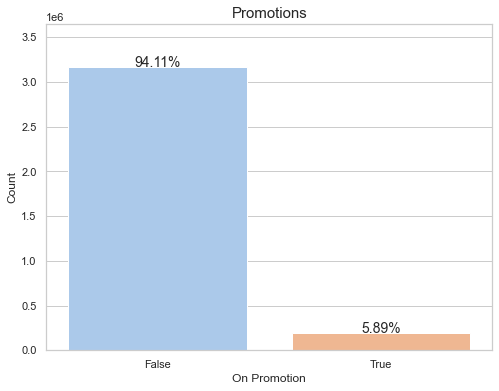

In [118]:
total = len(test)
plt.figure(figsize=(8,6))
g = sns.countplot(x='onpromotion', data=test, palette='pastel')
g.set_title("Promotions", fontsize = 15)
g.set_xlabel("On Promotion", fontsize = 12)
g.set_ylabel("Count", fontsize = 12)
sizes=[] # Get highest values in y
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
g.set_ylim(0, max(sizes) * 1.15) # set y limit based on highest heights

**94%** true cases and **6%** false cases of onpromotion column in test data

In [119]:
print(len(test['date'].unique()))

16


We are forecasting sales for **16 days** which is **1%** of training data

In [120]:
print (test.date.min())
print (test.date.max())

2017-08-16
2017-08-31


Time period for forecasting sales are from **2017-08-16** to **2017-08-31**

### Items 

#### Items data is all about item numbers assigned to family names like Grocery, Cleaning, Bread/Bakery,Beverages so on and Class numbers ranges from 1000 - 8000. Perishable means food which need to consume soon, it's either **0** or **1**

In [121]:
items.head()

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


In [122]:
items.shape

(4100, 4)

In [123]:
print(len(items['family'].unique()))

33


**33** different categories are there in family column

In [124]:
print(len(items['class'].unique()))

337


Class column has **337** unique integers between 1000-800

In [125]:
print(items.perishable.unique())

[0 1]


In [126]:
items['perishable'].value_counts(normalize=True, dropna=False)

0    0.759512
1    0.240488
Name: perishable, dtype: float64

**24%** are perishable items and remaining are not perishable

In [127]:
items['family'].value_counts(normalize=True, dropna=False)

GROCERY I                     0.325366
BEVERAGES                     0.149512
CLEANING                      0.108780
PRODUCE                       0.074634
DAIRY                         0.059024
PERSONAL CARE                 0.037317
BREAD/BAKERY                  0.032683
HOME CARE                     0.026341
DELI                          0.022195
MEATS                         0.020488
HOME AND KITCHEN I            0.018780
LIQUOR,WINE,BEER              0.017805
FROZEN FOODS                  0.013415
POULTRY                       0.013171
HOME AND KITCHEN II           0.010976
EGGS                          0.010000
CELEBRATION                   0.007561
PREPARED FOODS                0.006341
LAWN AND GARDEN               0.006341
LADIESWEAR                    0.005122
AUTOMOTIVE                    0.004878
LINGERIE                      0.004878
BEAUTY                        0.004634
PLAYERS AND ELECTRONICS       0.004146
SCHOOL AND OFFICE SUPPLIES    0.003659
PET SUPPLIES             

The top 3 family categories are Grocery, Beverages and Cleaning with **56%** of occurences in items dataset

In [128]:
items['class'].value_counts(normalize=True, dropna=False)

1016    0.032439
1040    0.026829
1124    0.024390
1034    0.023902
1122    0.019756
          ...   
2103    0.000244
6233    0.000244
4212    0.000244
4228    0.000244
6155    0.000244
Name: class, Length: 337, dtype: float64

### Stores

#### Store data contains details about stores like store number in which city and state the store is located, type of stores and cluster number the store belongs to

In [129]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [130]:
print(len(stores['type'].unique()))

5


In [131]:
print(len(stores['city'].unique()))

22


In [132]:
print(len(stores['state'].unique()))

16


In [133]:
stores['type'].value_counts(normalize=True, dropna=False)

D    0.333333
C    0.277778
A    0.166667
B    0.148148
E    0.074074
Name: type, dtype: float64

<AxesSubplot:xlabel='type', ylabel='count'>

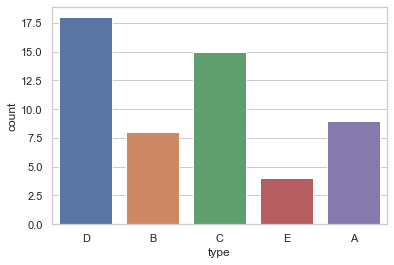

In [134]:
sns.countplot(x="type", data=stores)

A,B,C,D,E are the store types in store data in which **D 33%** and **C 27%** are the top most store types

In [135]:
stores['city'].value_counts(normalize=True, dropna=False)

Quito            0.333333
Guayaquil        0.148148
Cuenca           0.055556
Santo Domingo    0.055556
Latacunga        0.037037
Ambato           0.037037
Manta            0.037037
Machala          0.037037
Daule            0.018519
Quevedo          0.018519
Libertad         0.018519
Riobamba         0.018519
Esmeraldas       0.018519
Loja             0.018519
Guaranda         0.018519
Salinas          0.018519
Puyo             0.018519
Babahoyo         0.018519
Playas           0.018519
Ibarra           0.018519
El Carmen        0.018519
Cayambe          0.018519
Name: city, dtype: float64

**Quito** is the capital of Ecuador,city with highest **33%** of stores and Ecuador's largest city Guayaquil in second position with **15%**

[Text(0, 0, 'Quito'),
 Text(1, 0, 'Santo Domingo'),
 Text(2, 0, 'Cayambe'),
 Text(3, 0, 'Latacunga'),
 Text(4, 0, 'Riobamba'),
 Text(5, 0, 'Ibarra'),
 Text(6, 0, 'Guaranda'),
 Text(7, 0, 'Puyo'),
 Text(8, 0, 'Ambato'),
 Text(9, 0, 'Guayaquil'),
 Text(10, 0, 'Salinas'),
 Text(11, 0, 'Daule'),
 Text(12, 0, 'Babahoyo'),
 Text(13, 0, 'Quevedo'),
 Text(14, 0, 'Playas'),
 Text(15, 0, 'Libertad'),
 Text(16, 0, 'Cuenca'),
 Text(17, 0, 'Loja'),
 Text(18, 0, 'Machala'),
 Text(19, 0, 'Esmeraldas'),
 Text(20, 0, 'Manta'),
 Text(21, 0, 'El Carmen')]

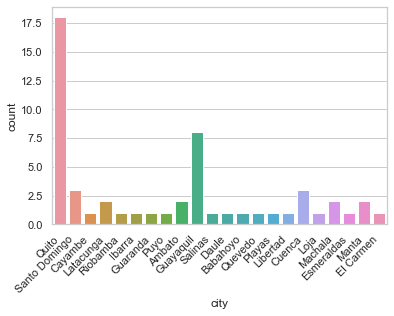

In [136]:
g=sns.countplot(x="city",data=stores)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [137]:
stores['state'].value_counts(normalize=True, dropna=False)

Pichincha                         0.351852
Guayas                            0.203704
Manabi                            0.055556
Santo Domingo de los Tsachilas    0.055556
Azuay                             0.055556
Tungurahua                        0.037037
Los Rios                          0.037037
Cotopaxi                          0.037037
El Oro                            0.037037
Bolivar                           0.018519
Chimborazo                        0.018519
Santa Elena                       0.018519
Loja                              0.018519
Pastaza                           0.018519
Imbabura                          0.018519
Esmeraldas                        0.018519
Name: state, dtype: float64

[Text(0, 0, 'Pichincha'),
 Text(1, 0, 'Santo Domingo de los Tsachilas'),
 Text(2, 0, 'Cotopaxi'),
 Text(3, 0, 'Chimborazo'),
 Text(4, 0, 'Imbabura'),
 Text(5, 0, 'Bolivar'),
 Text(6, 0, 'Pastaza'),
 Text(7, 0, 'Tungurahua'),
 Text(8, 0, 'Guayas'),
 Text(9, 0, 'Santa Elena'),
 Text(10, 0, 'Los Rios'),
 Text(11, 0, 'Azuay'),
 Text(12, 0, 'Loja'),
 Text(13, 0, 'El Oro'),
 Text(14, 0, 'Esmeraldas'),
 Text(15, 0, 'Manabi')]

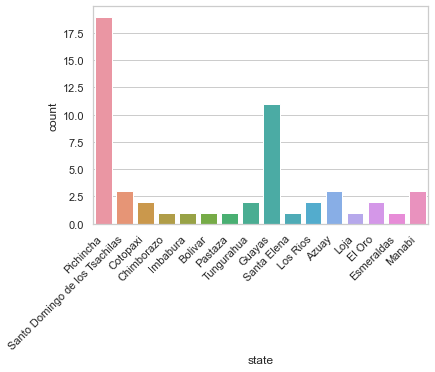

In [138]:
g=sns.countplot(x="state",data=stores)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

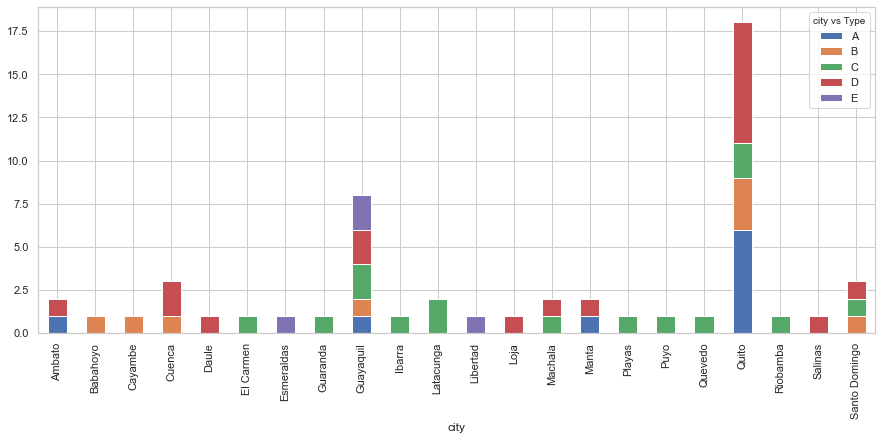

In [139]:
city_type = pd.crosstab(stores['city'], stores['type'])

city_type.plot.bar(figsize = (15, 6), stacked=True)
plt.legend(title='city vs Type')
plt.show()

**Guayaquil** have all 5 types of stores **Quito** is missing with **E** store type

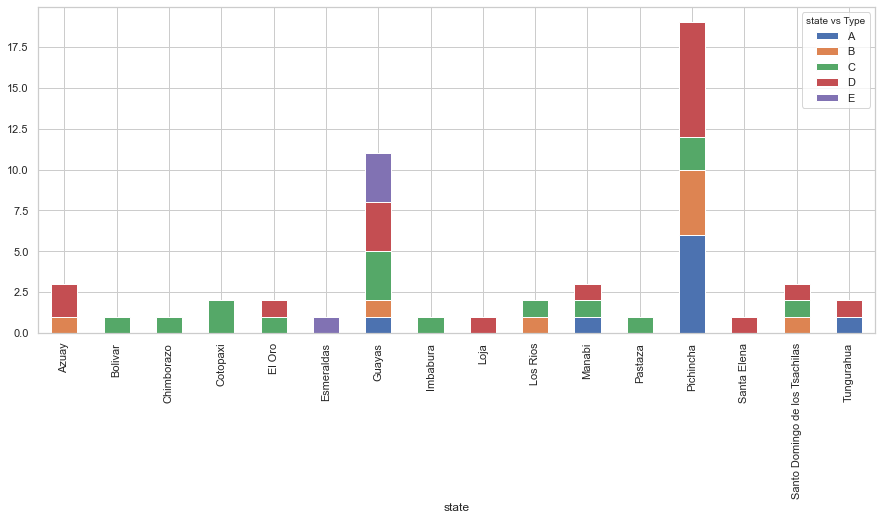

In [140]:
state_type = pd.crosstab(stores['state'], stores['type'])

state_type.plot.bar(figsize = (15, 6), stacked=True)
plt.legend(title='state vs Type')
plt.show()

In [141]:
stores['cluster'].value_counts(normalize=True, dropna=False)

3     0.129630
6     0.111111
10    0.111111
15    0.092593
14    0.074074
13    0.074074
1     0.055556
11    0.055556
8     0.055556
4     0.055556
2     0.037037
9     0.037037
7     0.037037
5     0.018519
16    0.018519
12    0.018519
17    0.018519
Name: cluster, dtype: float64

<AxesSubplot:xlabel='cluster', ylabel='count'>

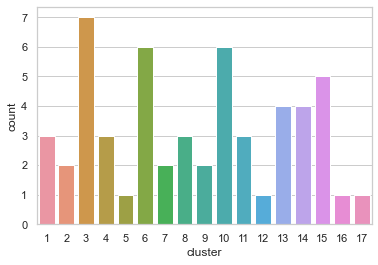

In [142]:
sns.countplot(x="cluster", data=stores)

<AxesSubplot:xlabel='cluster', ylabel='store_nbr'>

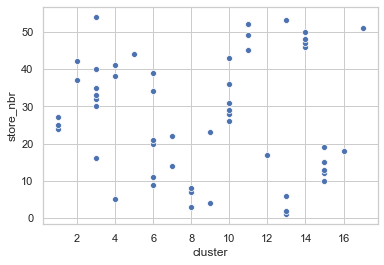

In [143]:
sns.scatterplot(data=stores, x="cluster",y="store_nbr")

Cluster **6** contains highest number of stores

<AxesSubplot:xlabel='store_nbr', ylabel='state'>

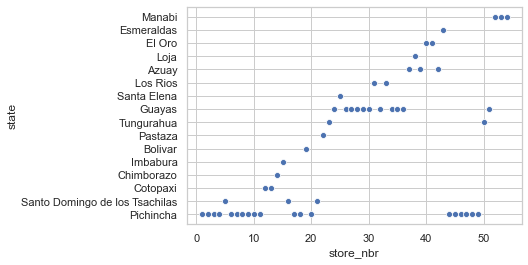

In [144]:
sns.scatterplot(data=stores, x="store_nbr",y="state")

In [145]:
cluster_type = pd.crosstab(stores['type'], stores['cluster'])
cluster_type

cluster,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
type,,,,,,,,,,,,,,,,,
A,0,0,0,0,1,0,0,0,0,0,3,0,0,4,0,0,1
B,0,0,0,0,0,6,0,0,0,1,0,0,0,0,0,1,0
C,0,0,7,0,0,0,2,0,0,0,0,1,0,0,5,0,0
D,3,2,0,3,0,0,0,3,2,1,0,0,4,0,0,0,0
E,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0


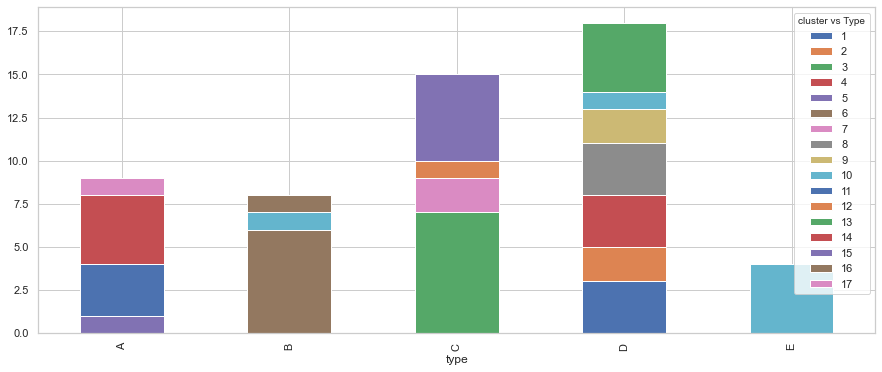

In [146]:
cluster_type.plot.bar(figsize = (15, 6), stacked=True)
plt.legend(title='cluster vs Type')
plt.show()

### Oil

#### Oil data tells about oil prices on respective dates

In [147]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [148]:
oil.dtypes

date           object
dcoilwtico    float64
dtype: object

In [149]:
oil['date']=pd.to_datetime(oil['date'])

In [150]:
oil_nan = (oil.isnull().sum() / oil.shape[0]) * 100
oil_nan

date          0.000000
dcoilwtico    3.530378
dtype: float64

**35%** of oil prices are missing

<AxesSubplot:xlabel='date', ylabel='dcoilwtico'>

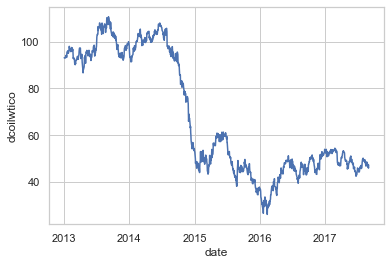

In [202]:
sns.lineplot(x="date", y="dcoilwtico", data=oil)

Oil prices heavily declined in June 2014, very low in 2016 and slightly increasing in 2017

In [152]:
oil['dcoilwtico'].describe()

count    1175.000000
mean       67.714366
std        25.630476
min        26.190000
25%        46.405000
50%        53.190000
75%        95.660000
max       110.620000
Name: dcoilwtico, dtype: float64

In [153]:
oil[oil.isnull().any(axis=1)]

,date,dcoilwtico
0,2013-01-01,NaN
14,2013-01-21,NaN
34,2013-02-18,NaN
63,2013-03-29,NaN
104,2013-05-27,NaN
132,2013-07-04,NaN
174,2013-09-02,NaN
237,2013-11-28,NaN
256,2013-12-25,NaN
261,2014-01-01,NaN


In [154]:
mask = (oil['date'] > '2017-08-16') & (oil['date'] < '2017-08-31')
print(oil.loc[mask])

           date  dcoilwtico
1207 2017-08-17       47.07
1208 2017-08-18       48.59
1209 2017-08-21       47.39
1210 2017-08-22       47.65
1211 2017-08-23       48.45
1212 2017-08-24       47.24
1213 2017-08-25       47.65
1214 2017-08-28       46.40
1215 2017-08-29       46.46
1216 2017-08-30       45.96


### Transactional data

In [155]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [156]:
transactions.dtypes

date            object
store_nbr        int64
transactions     int64
dtype: object

In [157]:
transactions.shape

(83488, 3)

In [158]:
transactions['date']=pd.to_datetime(transactions['date'])

In [159]:
transactions.isnull().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

In [160]:
transactions['year'] = transactions['date'].dt.year
transactions['month'] = transactions['date'].dt.month

<AxesSubplot:xlabel='month', ylabel='transactions'>

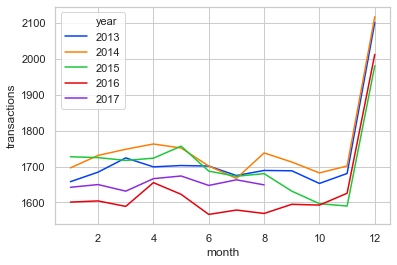

In [161]:
palette = sns.color_palette('bright', n_colors=5)
sns.lineplot(x="month", y="transactions",ci=None, hue="year", data=transactions, palette=palette)

<AxesSubplot:xlabel='store_nbr', ylabel='transactions'>

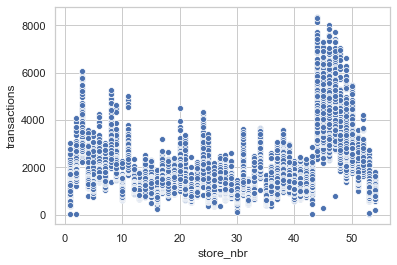

In [162]:
sns.scatterplot(data=transactions, x="store_nbr",y="transactions")

Store numbers between 40-50 having highest number of transactions

### Holidays

In [163]:
holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [164]:
holidays_events['date']=pd.to_datetime(holidays_events['date'])

In [165]:
print(holidays_events['type'].unique())

['Holiday' 'Transfer' 'Additional' 'Bridge' 'Work Day' 'Event']


In [166]:
mask = (holidays_events['date'] > '2017-08-16') & (holidays_events['date'] < '2017-08-31')
print(holidays_events.loc[mask])

          date     type locale locale_name          description  transferred
327 2017-08-24  Holiday  Local      Ambato  Fundacion de Ambato        False


Only one holiday is present between test data dates, it's a Thursday and 1 week before month end.

### We will join dataframes with train data to get more insights 

In [167]:

train = pd.merge(train, items, on= "item_nbr")

In [168]:
train.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,year,month,family,class,perishable
0,27847184,2014-07-25,4,360313,9.0,0,2014,7,BREAD/BAKERY,2702,1
1,34093330,2014-10-29,46,360313,2.0,0,2014,10,BREAD/BAKERY,2702,1
2,55924785,2015-09-07,1,360313,1.0,0,2015,9,BREAD/BAKERY,2702,1
3,25025272,2014-06-07,37,360313,6.0,0,2014,6,BREAD/BAKERY,2702,1
4,88785313,2016-08-22,42,360313,2.0,0,2016,8,BREAD/BAKERY,2702,1


<AxesSubplot:xlabel='perishable', ylabel='unit_sales'>

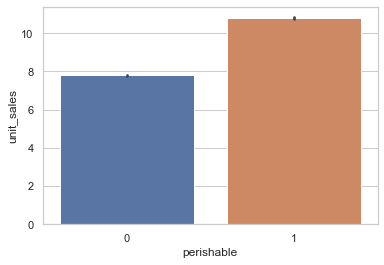

In [169]:
sns.barplot(data=train, x="perishable",y="unit_sales")

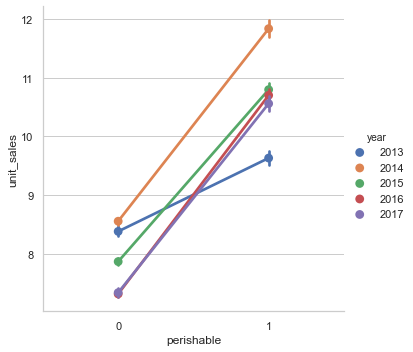

In [170]:
sns.catplot(x="perishable", y="unit_sales", hue="year", kind="point", 
            data=train)

Perishable items sales largely increased in 2014 and 2015. Non perishable items sales are low in 2016 and 2017

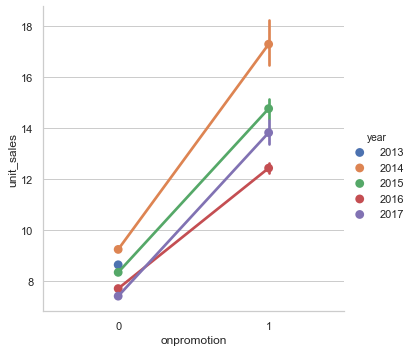

In [171]:
sns.catplot(x="onpromotion", y="unit_sales", hue="year", kind="point", 
            data=train)

The sales difference between promotion sales and not onpromotion are greater in 2014 compare to 2015 and 2013. Low differences recorded in 2016

[Text(0, 0, 'BREAD/BAKERY'),
 Text(1, 0, 'GROCERY I'),
 Text(2, 0, 'CLEANING'),
 Text(3, 0, 'BEVERAGES'),
 Text(4, 0, 'PRODUCE'),
 Text(5, 0, 'PREPARED FOODS'),
 Text(6, 0, 'DAIRY'),
 Text(7, 0, 'PERSONAL CARE'),
 Text(8, 0, 'FROZEN FOODS'),
 Text(9, 0, 'DELI'),
 Text(10, 0, 'LINGERIE'),
 Text(11, 0, 'POULTRY'),
 Text(12, 0, 'SEAFOOD'),
 Text(13, 0, 'HOME AND KITCHEN II'),
 Text(14, 0, 'MEATS'),
 Text(15, 0, 'LIQUOR,WINE,BEER'),
 Text(16, 0, 'AUTOMOTIVE'),
 Text(17, 0, 'EGGS'),
 Text(18, 0, 'HOME CARE'),
 Text(19, 0, 'PET SUPPLIES'),
 Text(20, 0, 'HOME AND KITCHEN I'),
 Text(21, 0, 'CELEBRATION'),
 Text(22, 0, 'HARDWARE'),
 Text(23, 0, 'LADIESWEAR'),
 Text(24, 0, 'PLAYERS AND ELECTRONICS'),
 Text(25, 0, 'BEAUTY'),
 Text(26, 0, 'MAGAZINES'),
 Text(27, 0, 'GROCERY II'),
 Text(28, 0, 'LAWN AND GARDEN'),
 Text(29, 0, 'SCHOOL AND OFFICE SUPPLIES'),
 Text(30, 0, 'HOME APPLIANCES'),
 Text(31, 0, 'BOOKS'),
 Text(32, 0, 'BABY CARE')]

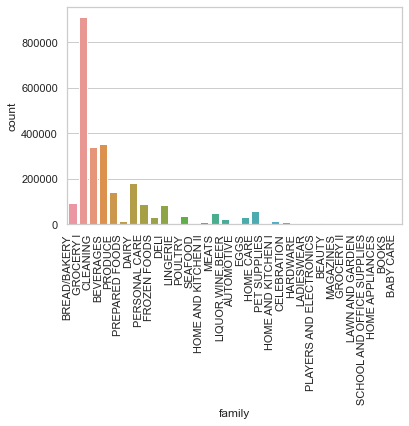

In [172]:
g=sns.countplot(x="family",data=train)
g.set_xticklabels(g.get_xticklabels(), rotation=90, horizontalalignment='right')

<AxesSubplot:xlabel='class', ylabel='unit_sales'>

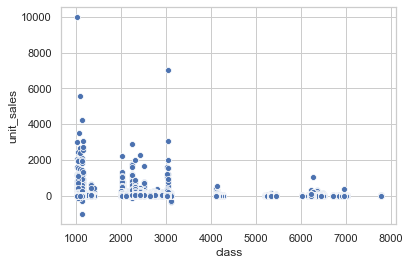

In [173]:
sns.scatterplot(data=train, x="class",y="unit_sales")

Class numbers between **1000-3000** having more sales than other class numbers

In [174]:
Item_Sales = train.groupby('item_nbr').sum().sort_values("unit_sales" ,ascending=False)
Item_Sales = y.loc[:, y.columns.intersection(['item_nbr','unit_sales'])]


In [175]:
Item_Sales.head(10)

,unit_sales
item_nbr,
1503844,119234.7037
1047679,107205.0000
1473474,95320.1277
364606,91016.0000
807493,89521.0000
1463992,88724.0000
819932,88268.0000
265559,80761.0000
559870,75588.0000


Top 10 items with highest number of sales

In [176]:
train = pd.merge(train, stores, on= "store_nbr")

In [177]:
train.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,year,month,family,class,perishable,city,state,type,cluster
0,27847184,2014-07-25,4,360313,9.0,0,2014,7,BREAD/BAKERY,2702,1,Quito,Pichincha,D,9
1,8903214,2013-07-28,4,360313,14.0,0,2013,7,BREAD/BAKERY,2702,1,Quito,Pichincha,D,9
2,3609236,2013-03-30,4,360313,9.0,0,2013,3,BREAD/BAKERY,2702,1,Quito,Pichincha,D,9
3,11836882,2013-09-30,4,360313,8.0,0,2013,9,BREAD/BAKERY,2702,1,Quito,Pichincha,D,9
4,70138042,2016-02-10,4,360313,2.0,0,2016,2,BREAD/BAKERY,2702,1,Quito,Pichincha,D,9


<AxesSubplot:xlabel='type', ylabel='unit_sales'>

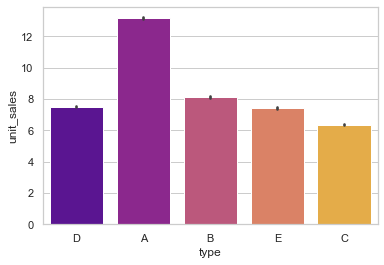

In [178]:
sns.barplot(x ='type', y ='unit_sales', data = train,  
            palette ='plasma') 

[Text(0, 0, 'Quito'),
 Text(1, 0, 'Cuenca'),
 Text(2, 0, 'Guayaquil'),
 Text(3, 0, 'Santo Domingo'),
 Text(4, 0, 'Manta'),
 Text(5, 0, 'Ambato'),
 Text(6, 0, 'Babahoyo'),
 Text(7, 0, 'Loja'),
 Text(8, 0, 'Daule'),
 Text(9, 0, 'Machala'),
 Text(10, 0, 'Salinas'),
 Text(11, 0, 'Esmeraldas'),
 Text(12, 0, 'Libertad'),
 Text(13, 0, 'Cayambe'),
 Text(14, 0, 'Ibarra'),
 Text(15, 0, 'El Carmen'),
 Text(16, 0, 'Riobamba'),
 Text(17, 0, 'Guaranda'),
 Text(18, 0, 'Latacunga'),
 Text(19, 0, 'Quevedo'),
 Text(20, 0, 'Playas'),
 Text(21, 0, 'Puyo')]

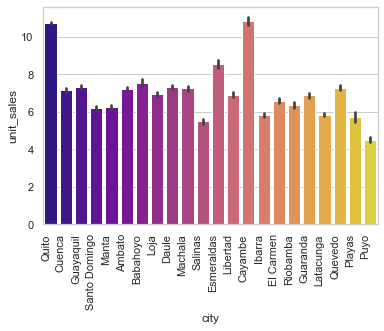

In [179]:
g=sns.barplot(x ='city', y ='unit_sales', data = train,  
            palette ='plasma') 
g.set_xticklabels(g.get_xticklabels(), rotation=90, horizontalalignment='right')

[Text(0, 0, 'Pichincha'),
 Text(1, 0, 'Azuay'),
 Text(2, 0, 'Guayas'),
 Text(3, 0, 'Santo Domingo de los Tsachilas'),
 Text(4, 0, 'Manabi'),
 Text(5, 0, 'Tungurahua'),
 Text(6, 0, 'Los Rios'),
 Text(7, 0, 'Loja'),
 Text(8, 0, 'El Oro'),
 Text(9, 0, 'Santa Elena'),
 Text(10, 0, 'Esmeraldas'),
 Text(11, 0, 'Imbabura'),
 Text(12, 0, 'Chimborazo'),
 Text(13, 0, 'Bolivar'),
 Text(14, 0, 'Cotopaxi'),
 Text(15, 0, 'Pastaza')]

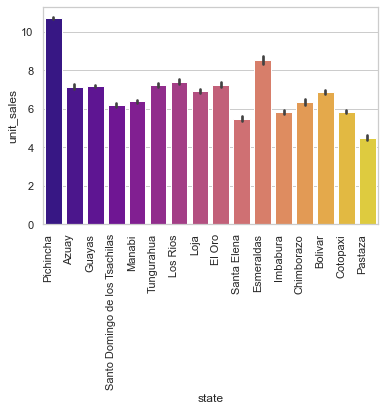

In [180]:
g=sns.barplot(x ='state', y ='unit_sales', data = train,  
            palette ='plasma') 
g.set_xticklabels(g.get_xticklabels(), rotation=90, horizontalalignment='right')

In [181]:
State-City = train.groupby(['state','city'])['unit_sales'].sum()

In [182]:
State_city

state                           city         
Azuay                           Cuenca           9.895462e+05
Bolivar                         Guaranda         2.573754e+05
Chimborazo                      Riobamba         2.284696e+05
Cotopaxi                        Latacunga        4.175310e+05
El Oro                          Machala          6.695115e+05
Esmeraldas                      Esmeraldas       3.326781e+05
Guayas                          Daule            3.842962e+05
                                Guayaquil        2.448830e+06
                                Libertad         3.067766e+05
                                Playas           1.559363e+05
Imbabura                        Ibarra           2.264324e+05
Loja                            Loja             3.805843e+05
Los Rios                        Babahoyo         3.550673e+05
                                Quevedo          2.821266e+05
Manabi                          El Carmen        2.149680e+05
                        

**Pichincha** having higest number of sales with top 2 cities **Quito** and **Cayambe** 

In [185]:
train = pd.merge(train, oil, on="date")

In [186]:
train.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,year,month,family,class,...,city,state,type_x,cluster,type_y,locale,locale_name,description,transferred,dcoilwtico
0,27847184,2014-07-25,4,360313,9.0,0,2014,7,BREAD/BAKERY,2702,...,Quito,Pichincha,D,9,Holiday,Local,Guayaquil,Fundacion de Guayaquil,False,105.23
1,27847529,2014-07-25,4,750856,4.0,0,2014,7,GROCERY I,1062,...,Quito,Pichincha,D,9,Holiday,Local,Guayaquil,Fundacion de Guayaquil,False,105.23
2,27848489,2014-07-25,4,1609719,2.0,0,2014,7,PRODUCE,2002,...,Quito,Pichincha,D,9,Holiday,Local,Guayaquil,Fundacion de Guayaquil,False,105.23
3,27847628,2014-07-25,4,838412,6.0,0,2014,7,DAIRY,2128,...,Quito,Pichincha,D,9,Holiday,Local,Guayaquil,Fundacion de Guayaquil,False,105.23
4,27846942,2014-07-25,4,105857,2.0,0,2014,7,GROCERY I,1092,...,Quito,Pichincha,D,9,Holiday,Local,Guayaquil,Fundacion de Guayaquil,False,105.23


<AxesSubplot:xlabel='dcoilwtico', ylabel='unit_sales'>

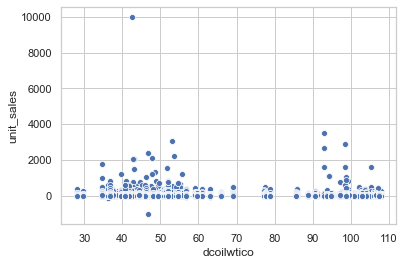

In [209]:
sns.scatterplot(data=train, x="dcoilwtico",y="unit_sales")

Sales are more when oil prices between ***35*-*55***